In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load cleaned dataset:
vg_sales = pd.read_csv('./dataset/vg_sales_cleaned.csv', index_col=0)

In [3]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


## EDA on Video Games Sales

In [4]:
vg_sales['Year_of_Release'] = vg_sales['Year_of_Release'].astype(np.int)

In [5]:
vg_sales.Year_of_Release.describe()

count    16719.000000
mean      2006.464143
std          5.897407
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

* The max value of 2020 is kinda wrong as this data was scraped in 2016 so there's should be no games at least greater than 2017.
* Looking at this data, I found (by a quick search on google) that this game was actually released on 2009.
* So I instead used this fact to change the year of release of this game:

In [6]:
# Checking the game with a 2020 year release:
vg_sales[vg_sales.Year_of_Release == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,NaN,NaN,E


In [7]:
# Imagine: Makeup Artist was actually released on 12/05/2009:
vg_sales.loc[5936, 'Year_of_Release'] = 2009

In [8]:
# Looking at the updated statistics:
vg_sales['Year_of_Release'].describe()

count    16719.000000
mean      2006.463485
std          5.896511
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: Year_of_Release, dtype: float64

* Now we can see here that the record sales started on 1980 to 2017.

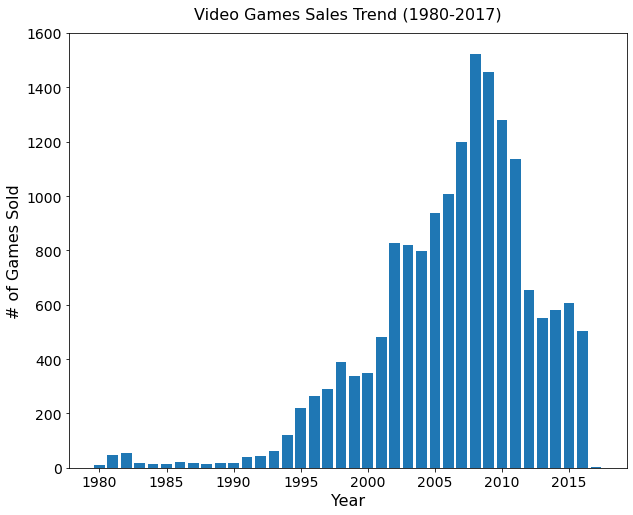

In [9]:
# How the trend for video games grow for the past years?
year_sales_counts = vg_sales['Year_of_Release'].value_counts()
year_sales_counts = year_sales_counts.sort_index()

fig, ax = plt.subplots(figsize=(10,8))
ax.bar(year_sales_counts.index, year_sales_counts.values)
ax.set_title('Video Games Sales Trend (1980-2017)', fontsize=16, y=1.02)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('# of Games Sold', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

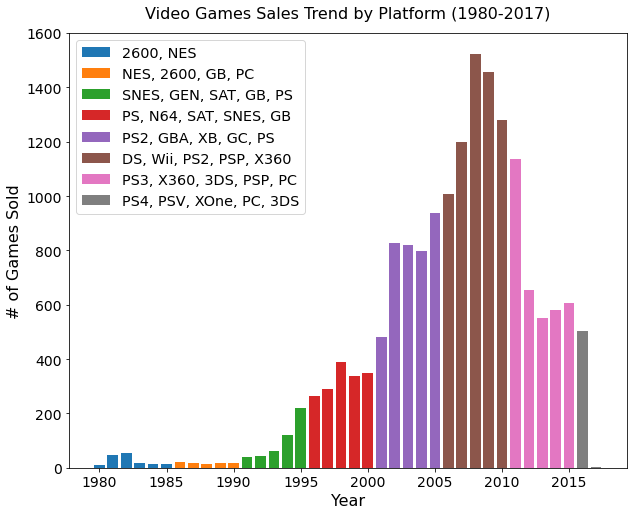

In [10]:
# What are the top 5 platforms for each 5 year time period beginning from 1980 to 2017?

def get_modal_platform(year_range):
    year_range_record = vg_sales[vg_sales.Year_of_Release.isin(year_range)]
    return year_range_record['Platform'].value_counts().index[:5]

fig, ax = plt.subplots(figsize=(10,8))
start, end = 1980, 1985
for i in range(10):
    modal_platform = ', '.join(get_modal_platform(range(start, end)))
    ax.bar(year_sales_counts.loc[start:end].index, 
           year_sales_counts.loc[start:end].values, 
           label=modal_platform)
    start = end + 1
    end = end + 5

ax.set_title('Video Games Sales Trend by Platform (1980-2017)', fontsize=16, y=1.02)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('# of Games Sold', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
_ = ax.legend(fontsize='x-large')

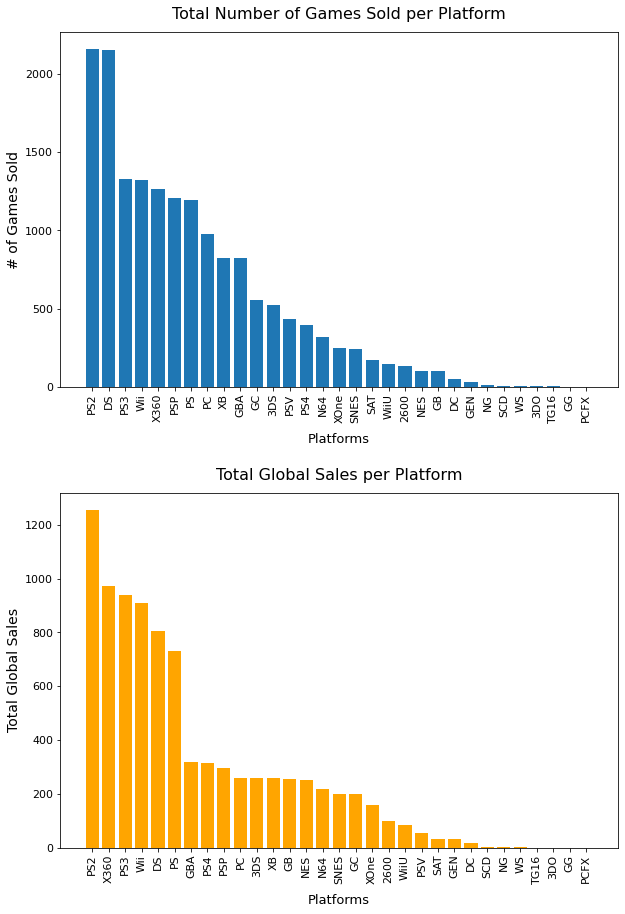

In [11]:
fig, axes = plt.subplots(2, figsize=(10, 15))

# Compute total quantity of vg sold per platform
platform_sales = vg_sales.Platform.value_counts()
platform_sales = platform_sales.sort_values(ascending=False)
axes[0].bar(platform_sales.index, platform_sales.values)
axes[0].set_title('Total Number of Games Sold per Platform', fontsize=16, y=1.02)
axes[0].set_xlabel('Platforms', fontsize=13, labelpad=10)
axes[0].set_ylabel('# of Games Sold', fontsize=14)
axes[0].tick_params(axis='x', labelsize=11, rotation=90)
axes[0].tick_params(axis='y', labelsize=11)

# Compute for total vg global sales for each platform
platform_global_sales = vg_sales.groupby('Platform')['Global_Sales']
platform_global_sales = platform_global_sales.sum().sort_values(ascending=False)
axes[1].bar(platform_global_sales.index, platform_global_sales.values, color='orange')
axes[1].set_title('Total Global Sales per Platform', fontsize=16, y=1.02)
axes[1].set_xlabel('Platforms', fontsize=13, labelpad=10)
axes[1].set_ylabel('Total Global Sales', fontsize=14)
axes[1].tick_params(axis='x', labelsize=11, rotation=90)
axes[1].tick_params(axis='y', labelsize=11)

fig.subplots_adjust(hspace=0.30)

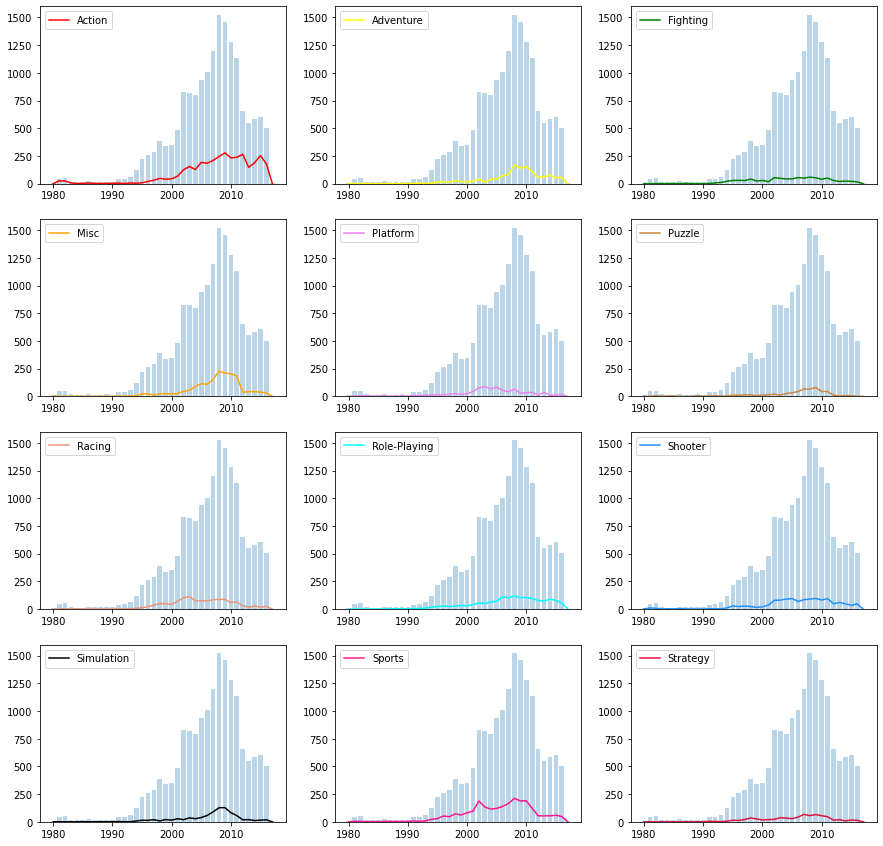

In [61]:
# How is the trend for each Genre grow for the past years?
res = pd.crosstab(vg_sales['Year_of_Release'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

colors_genre = ['red','yellow', 'green', 'orange','violet', 'peru', 
          'darksalmon', 'cyan','dodgerblue','black','deeppink','crimson']

for i in range(4):
    for j in range(3):
        genre_rec = res.iloc[:, i*3+j]
        axes[i, j].bar(year_sales_counts.index, year_sales_counts.values, alpha=0.3)
        axes[i, j].plot(genre_rec, label=genre_rec.name, color=colors[i*3+j])
        _ = axes[i, j].legend(loc='upper left')

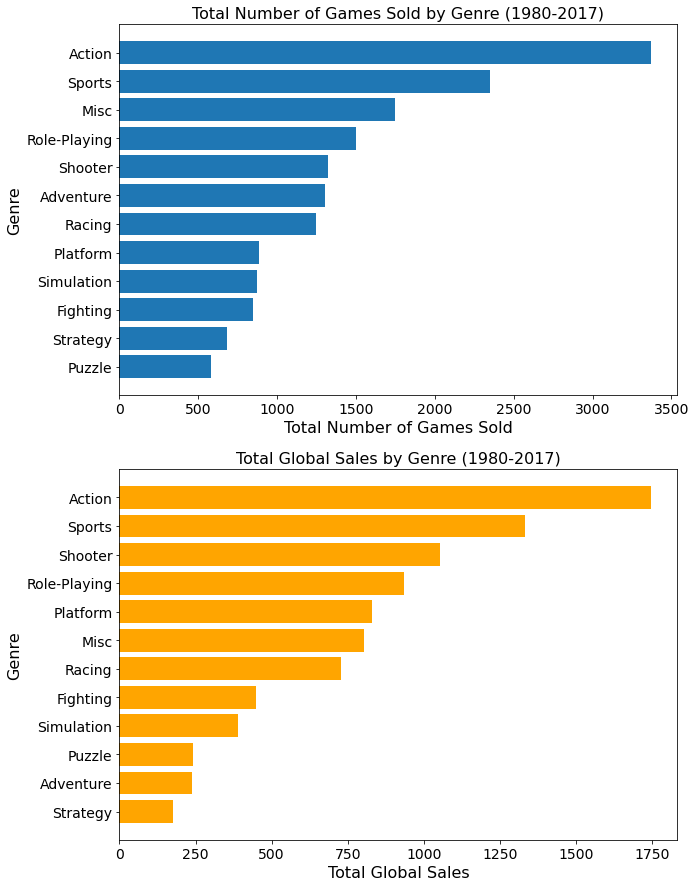

In [60]:
fig, axes = plt.subplots(2, figsize=(10, 15))

# What is the total number of games sold per genre? 
genre_sales = vg_sales.Genre.value_counts()
genre_sales = genre_sales.sort_values()
axes[0].barh(genre_sales.index, genre_sales.values)
axes[0].set_title('Total Number of Games Sold by Genre (1980-2017)', fontsize=16)
axes[0].set_xlabel('Total Number of Games Sold', fontsize=16)
axes[0].set_ylabel('Genre', fontsize=16)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=14)

# What is the highest selling genre?
grouped = vg_sales.groupby('Genre')['Global_Sales']
res = grouped.agg('sum').sort_values()
axes[1].barh(res.index, res.values, color='orange')
axes[1].set_title('Total Global Sales by Genre (1980-2017)', fontsize=16)
axes[1].set_xlabel('Total Global Sales', fontsize=16)
axes[1].set_ylabel('Genre', fontsize=16)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=14)

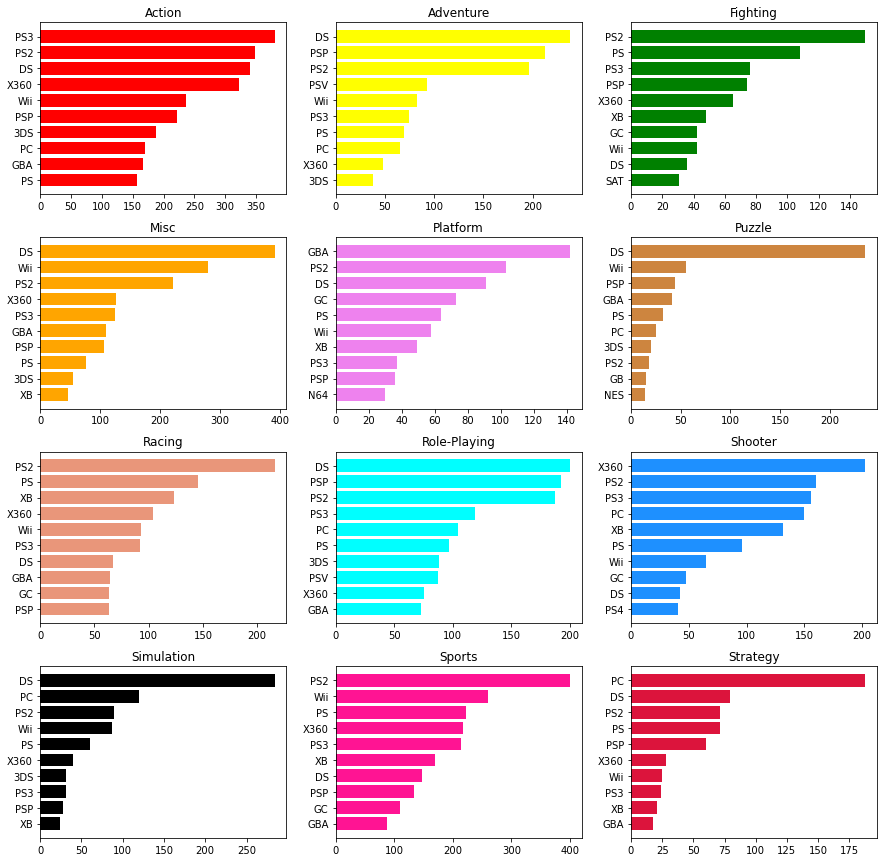

In [70]:
# What are the top 10 modal platforms for each Genre?
res = pd.crosstab(vg_sales['Platform'], vg_sales['Genre'])
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i in range(4):
    for j in range(3):
        rec = res.iloc[:, i*3+j].sort_values()[-10:]
        axes[i, j].barh(rec.index, rec.values, color=colors_genre[i*3+j])
        axes[i, j].set_title(rec.name, fontsize=12)
fig.subplots_adjust(hspace=0.25)

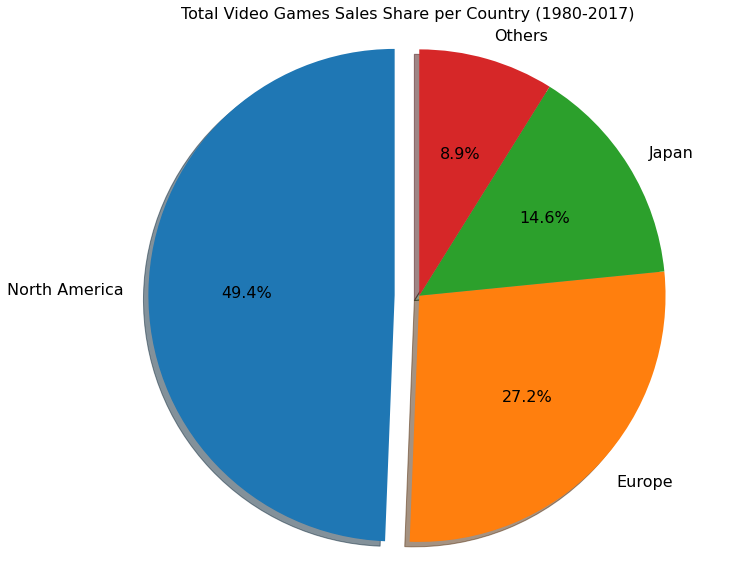

In [15]:
# Total number of video games sold per region (in pct)
region_sales_total = vg_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=0)
region_sales_pct = region_sales_total.div(region_sales_total.sum()) * 100
labels = ['North America', 'Europe', 'Japan', 'Others']
sizes = region_sales_pct.values
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90, textprops=dict(fontsize=16))
ax1.axis('equal')
ax1.set_title('Total Video Games Sales Share per Country (1980-2017)', fontsize=16)
plt.show()

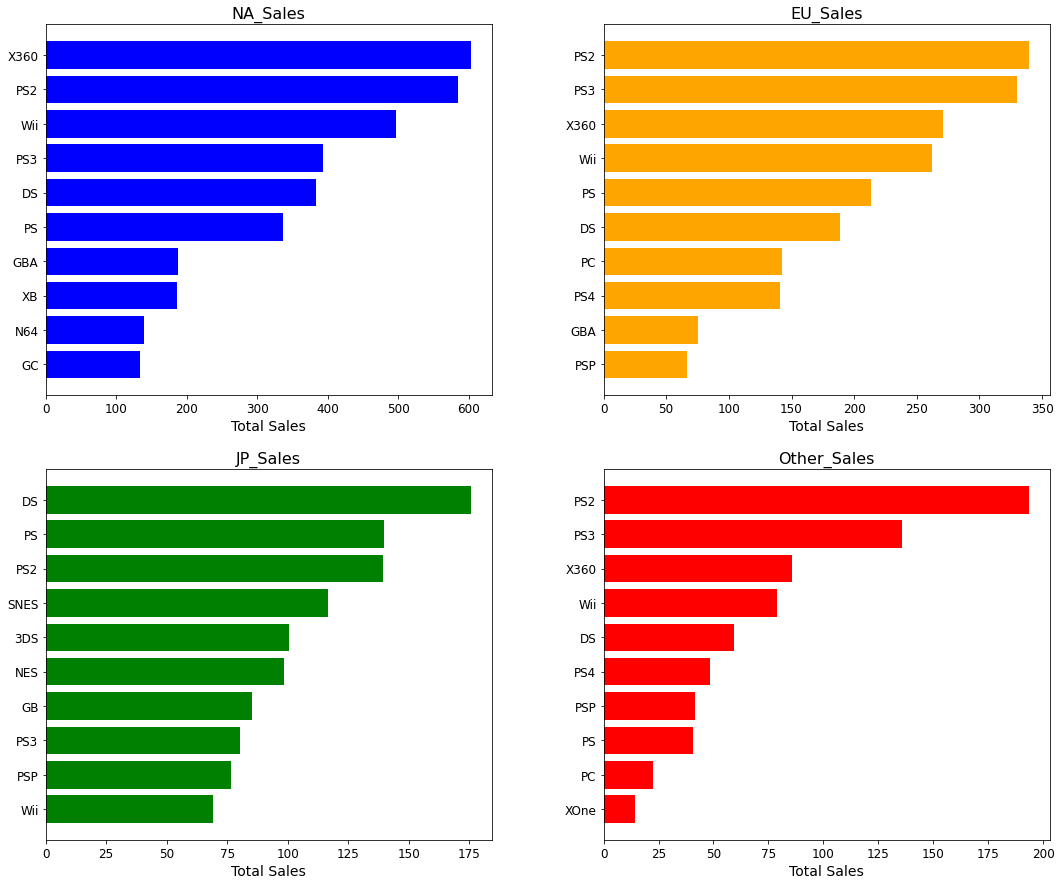

In [95]:
# What are the high selling platforms per region?

grouped = vg_sales.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
colors_region = ['blue', 'orange', 'green', 'red']
for i in range(2):
    for j in range(2):
        rec = res.iloc[i*2+j, :].sort_values()[-10:]
        axes[i, j].barh(rec.index, rec.values, color=colors_region[i*2+j])
        axes[i, j].set_title(rec.name, fontsize=16)
        axes[i, j].set_xlabel('Total Sales', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=12)
        axes[i, j].tick_params(axis='y', labelsize=12)  
fig.subplots_adjust(hspace=0.2, wspace=0.25)

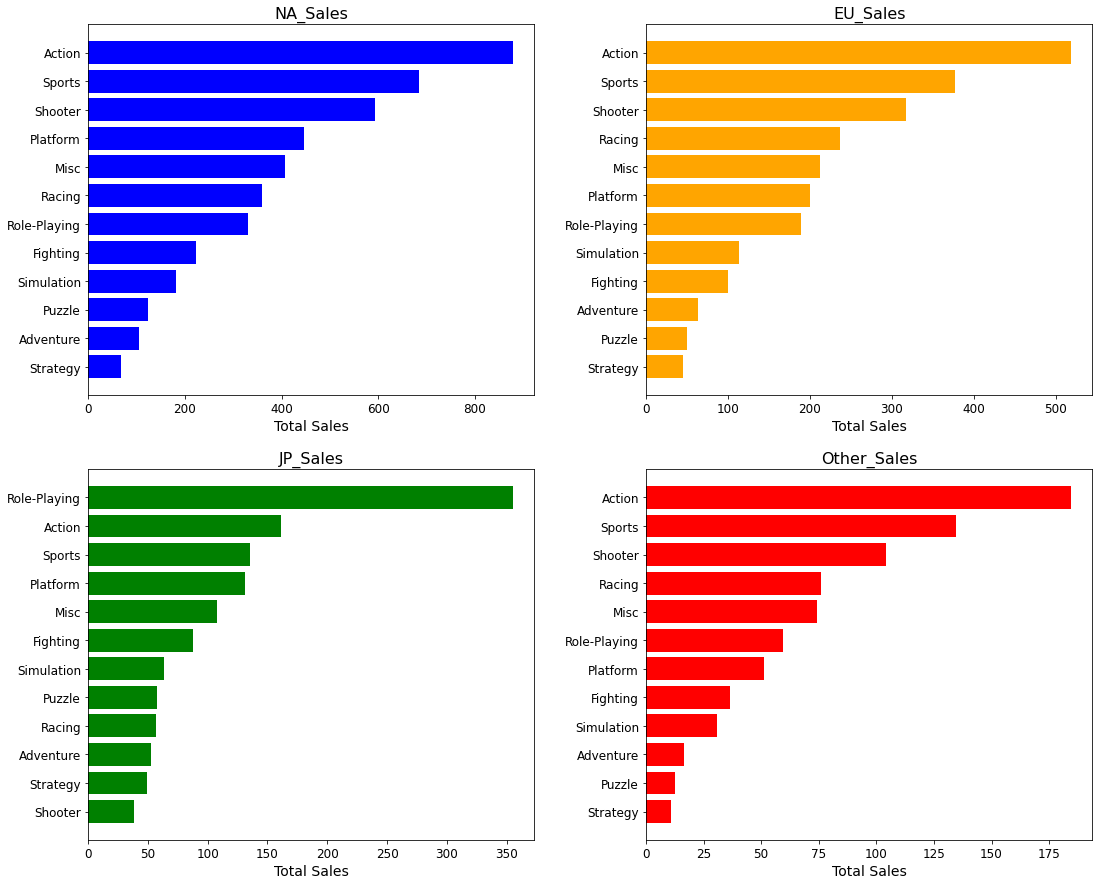

In [94]:
# What is the highest selling genre per region?
grouped = vg_sales.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = grouped.agg('sum').T
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
for i in range(2):
    for j in range(2):
        rec = res.iloc[i*2+j, :].sort_values()
        axes[i, j].barh(rec.index, rec.values, color=colors_region[i*2+j])
        axes[i, j].set_title(rec.name, fontsize=16)
        axes[i, j].set_xlabel('Total Sales', fontsize=14)
        axes[i, j].tick_params(axis='x', labelsize=12)
        axes[i, j].tick_params(axis='y', labelsize=12)
fig.subplots_adjust(hspace=0.2, wspace=0.25)

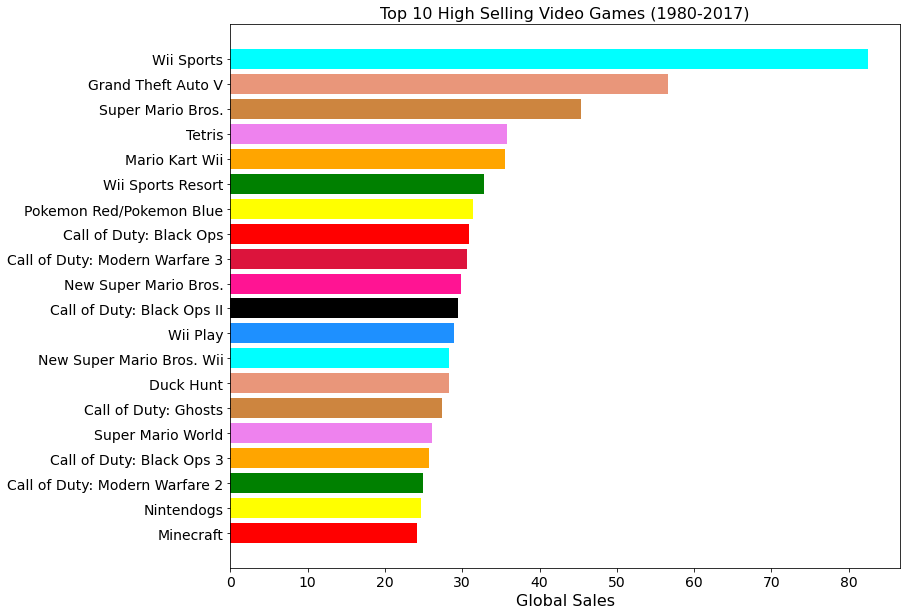

In [106]:
# Top 10 games with highest global sales:
res = vg_sales.groupby('Name')['Global_Sales']
res = res.sum().sort_values()[-20:]
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(res.index, res.values, color=colors_genre)
ax.set_title('Top 10 High Selling Video Games (1980-2017)', fontsize=16)
ax.set_xlabel('Global Sales', fontsize=16)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

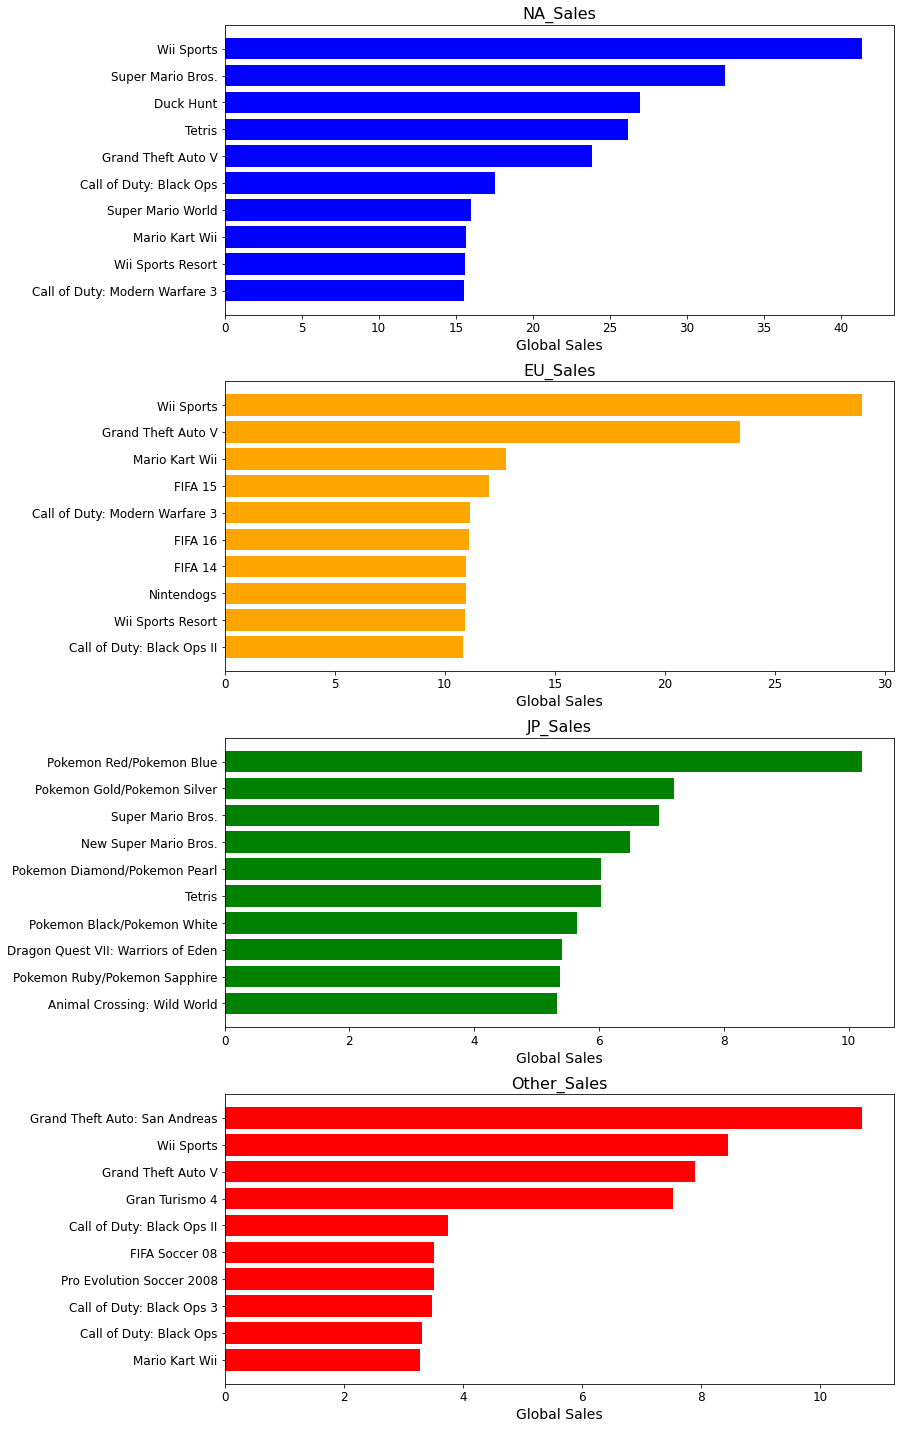

In [105]:
# Top 10 games with highest sales for each region:
res = vg_sales.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
res = res.sum()
fig, axes = plt.subplots(4, 1, figsize=(12, 25))
for i in range(4):
    rec = res.iloc[:, i].sort_values()[-10:]
    axes[i].barh(rec.index, rec.values, color=colors_region[i])
    axes[i].set_title(rec.name, fontsize=16)
    axes[i].set_xlabel('Global Sales', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
fig.subplots_adjust(hspace=0.23)

In [109]:
top_10_platforms

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA'], dtype='object')

IndexError: index 10 is out of bounds for axis 0 with size 10

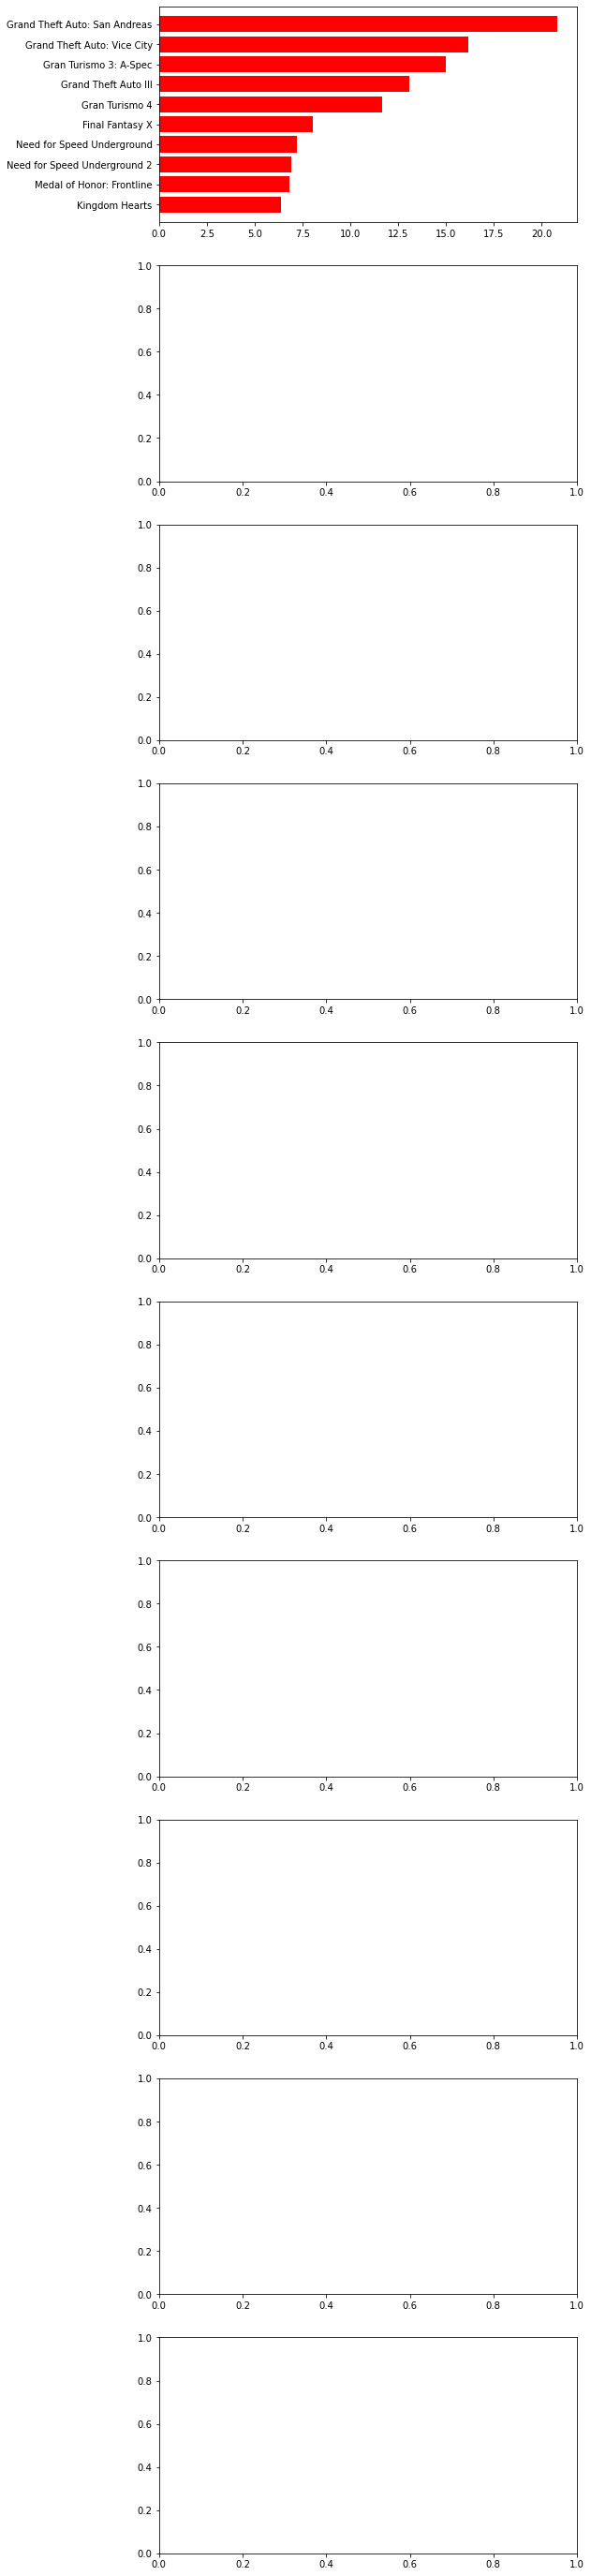

In [110]:
# Top 10 games with highest sales for each platform:
res = vg_sales.groupby('Platform')[['Name', 'Global_Sales']]
res = res.apply(lambda x: x.sort_values('Global_Sales')[-10:])
top_10_platforms = platform_sales.index[:10]
fig, axes = plt.subplots(10, 1, figsize=(8, 50))
for i in range(10):
    rec = res.loc[top_10_platforms[i]]
    axes[i].barh(rec.Name, rec.Global_Sales, color=colors_genre[i])
    axes[i].set_title(top_10_platforms[count], fontsize=13)
    axes[i].set_xlabel('Global Sales', fontsize=12)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].yaxis.set_label_position("right")
    axes[i].yaxis.tick_right()
fig.subplots_adjust(hspace=0.32)